In [1]:
import os
#import h5py
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use([hep.style.ATLAS, {'axes.labelsize': 20}, {'axes.labelpad': 20}, {'axes.titlelocation': 'right'}, ])

cwd = os.getcwd()

#Flags
log_y = True

In [2]:
# Read dataset with seaborn

#BR_exp_limits_20p = sns.load_dataset("BR_exp_limits_20p")
#BR_exp_limits_30p = sns.load_dataset("BR_exp_limits_30p")
#BR_exp_limits_40p = sns.load_dataset("BR_exp_limits_40p")
#BR_exp_limits_doublebkg_40p = sns.load_dataset("BR_exp_limits_doublebkg_40p")

#BR_exp_limits_doublebkg_40p_500758 = sns.load_dataset("BR_exp_limits_doublebkg_40p_500758")
#BR_exp_limits_doublebkg_40p_500761 = sns.load_dataset("BR_exp_limits_doublebkg_40p_500761")
#BR_exp_limits_doublebkg_40p_500762 = sns.load_dataset("BR_exp_limits_doublebkg_40p_500762")
#BR_exp_limits_doublebkg_40p_500763 = sns.load_dataset("BR_exp_limits_doublebkg_40p_500763")
#BR_exp_limits_doublebkg_40p_500764 = sns.load_dataset("BR_exp_limits_doublebkg_40p_500764")

#BR_exp_limits_20p_500758 = sns.load_dataset("BR_exp_limits_20p_500758")
#BR_exp_limits_20p_500761 = sns.load_dataset("BR_exp_limits_20p_500761")
#BR_exp_limits_20p_500762 = sns.load_dataset("BR_exp_limits_20p_500762")

# Read dataset with pandas

BR_exp_limits_20p = pd.read_csv("csvs/BR_exp_limits_20p.csv")
BR_exp_limits_30p = pd.read_csv("csvs/BR_exp_limits_30p.csv")
BR_exp_limits_40p = pd.read_csv("csvs/BR_exp_limits_40p.csv")
BR_exp_limits_doublebkg_40p = pd.read_csv("csvs/BR_exp_limits_doublebkg_40p.csv")

BR_exp_limits_doublebkg_40p_500758 = pd.read_csv("csvs/BR_exp_limits_doublebkg_40p_500758.csv")
BR_exp_limits_doublebkg_40p_500761 = pd.read_csv("csvs/BR_exp_limits_doublebkg_40p_500761.csv")
BR_exp_limits_doublebkg_40p_500762 = pd.read_csv("csvs/BR_exp_limits_doublebkg_40p_500762.csv")
BR_exp_limits_doublebkg_40p_500763 = pd.read_csv("csvs/BR_exp_limits_doublebkg_40p_500763.csv")
BR_exp_limits_doublebkg_40p_500764 = pd.read_csv("csvs/BR_exp_limits_doublebkg_40p_500764.csv")

BR_exp_limits_20p_500758 = pd.read_csv("csvs/BR_exp_limits_20p_500758.csv")
BR_exp_limits_20p_500761 = pd.read_csv("csvs/BR_exp_limits_20p_500761.csv")
BR_exp_limits_20p_500762 = pd.read_csv("csvs/BR_exp_limits_20p_500762.csv")

# For latest limits
BR_exp_limits_50p_500757 = pd.read_csv("BR_exp_limits_50p_500757.csv")
BR_exp_limits_50p_500758 = pd.read_csv("BR_exp_limits_50p_500758.csv")
BR_exp_limits_50p_500761 = pd.read_csv("BR_exp_limits_50p_500761.csv")
BR_exp_limits_50p_500762 = pd.read_csv("BR_exp_limits_50p_500762.csv")

In [3]:
# Plots config
#plots = ['eff_vs_ctaus_500757','eff_vs_ctaus_500758','eff_vs_ctaus_500759','eff_vs_ctaus_500760','eff_vs_ctaus_500763','eff_vs_ctaus_500764']
#dataFiles = [eff_vs_ctaus_500757,eff_vs_ctaus_500758,eff_vs_ctaus_500759,eff_vs_ctaus_500760,eff_vs_ctaus_500763,eff_vs_ctaus_500764,BR_exp_limits_doublebkg_40p]
dataFiles = [BR_exp_limits_doublebkg_40p,BR_exp_limits_20p,BR_exp_limits_30p,BR_exp_limits_40p]

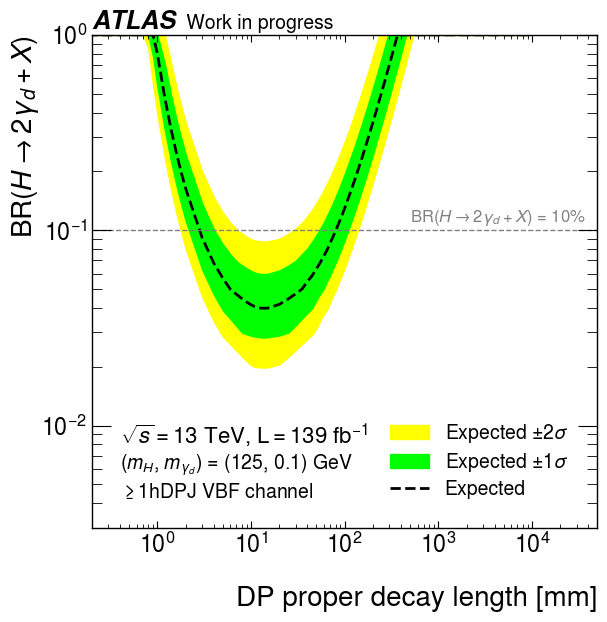

In [4]:
#for index_plot, plot in enumerate(plots):
figure, axis = plt.subplots(figsize=(6.4,6.4))

#2 sigma band
plt.fill_between(dataFiles[1].ctau.values, dataFiles[1].low_2sig, dataFiles[1].high_2sig, color='yellow', label='Expected $\\pm 2 \\sigma$')#, alpha=0.2)
#1 sigma band
plt.fill_between(dataFiles[1].ctau.values, dataFiles[1].low_1sig, dataFiles[1].high_1sig, color='lime', label='Expected $\\pm 1 \\sigma$')#, alpha=0.2)
#central values
plot=sns.lineplot(data=dataFiles[1], x='ctau', y='exp_lim', ax=axis, color='black', label='Expected')
plot.lines[0].set_linestyle("--")

#BR=10% line
plt.plot([1e-1,5e4], [1e-1,1e-1], color='grey', linestyle='--', linewidth=1) # 1e4
plt.text(5e2, 1.1e-1, 'BR($H \\rightarrow 2\\gamma_{d} + X$) = 10%', color='grey', fontsize=12) # 1.5e2

#axis.set_ylabel('$\\mu_{exp}$ upper limit', labelpad=0)
axis.set_ylabel('BR($H \\rightarrow 2\\gamma_{d} + X$)', labelpad=0)
axis.set_xlabel('DP proper decay length [mm]')
axis.set_xscale('log')
axis.set_xlim(2e-1,5e4) # match ggF plot

if log_y == True:
    axis.set_yscale('log')
    axis.set_ylim(3e-3,1) # was 1e-2,1, match ggF plot
    plt.text(0.4,0.8e-2,'$\\sqrt{s}=13$ TeV, $\\mathcal{L}=139$ fb$^{-1}$', fontsize=16) # 0.2,2.4e-2
    plt.text(0.4,0.6e-2,'($m_H$, $m_{\\gamma_{d}}$) = (125, 0.1) GeV', fontsize=14) # 0.2,1.9e-2
    plt.text(0.4,0.425e-2,'$\\geq 1$hDPJ VBF channel', fontsize=14) # 0.2,1.45e-2
else:
    axis.set_ylim(0,5e-4) #was 5e-4
    plt.text(0.18,4.3e-4,'FRVZ model - VBF hDPJ', fontsize=14)
    plt.text(0.18,4.1e-4,'H $\\rightarrow 2\\gamma_{d} +$ X, $m_H = 125$ GeV', fontsize=14)

hep.atlas.text(' Work in progress', loc=0)
plt.legend(loc=4) #choose legend corner
#plt.setp(axis.get_legend().get_texts(), fontsize='10')

if log_y == True:
    plt.savefig( cwd + '/plots/BR_exp_vs_ctau_20p.png', bbox_inches='tight')
else:
    plt.savefig( cwd + '/plots/effs_vs_ctaus.png', bbox_inches='tight')

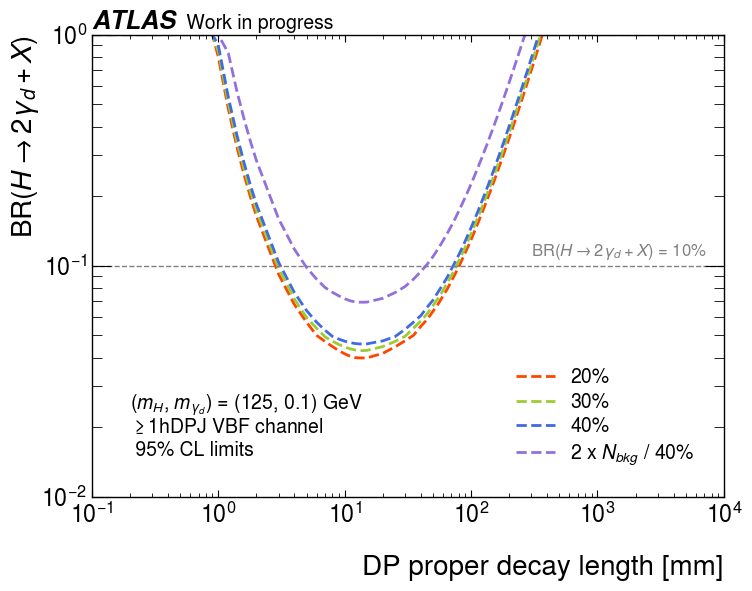

In [5]:
figure, axis = plt.subplots()

plt.plot('ctau', 'exp_lim', data=dataFiles[1], color='orangered', label='20%', linestyle='--')
plt.plot('ctau', 'exp_lim', data=dataFiles[2], color='yellowgreen', label='30%', linestyle='--')
plt.plot('ctau', 'exp_lim', data=dataFiles[3], color='royalblue', label='40%', linestyle='--')
plt.plot('ctau', 'exp_lim', data=dataFiles[0], color='mediumpurple', label='2 x $N_{bkg}$ / 40%', linestyle='--')

plt.plot([1e-1,1e4], [1e-1,1e-1], color='grey', linestyle='--', linewidth=1)
plt.text(3e2, 1.1e-1, 'BR($H \\rightarrow 2\\gamma_{d} + X$) = 10%', color='grey', fontsize=12)

axis.set_ylabel('BR($H \\rightarrow 2\\gamma_{d} + X$)', labelpad=0)
axis.set_xlabel('DP proper decay length [mm]')
axis.set_xscale('log')
axis.set_yscale('log')
axis.set_ylim(1e-2,1)

#plt.text(0.2,2.4e-2,'$\\sqrt{s}=13$ TeV, $\\mathcal{L}=139$ fb$^{-1}$', fontsize=16)
plt.text(0.2,2.4e-2,'($m_H$, $m_{\\gamma_{d}}$) = (125, 0.1) GeV', fontsize=14)
plt.text(0.2,1.9e-2,'$\\geq 1$hDPJ VBF channel', fontsize=14)
plt.text(0.2,1.5e-2,' 95% CL limits', fontsize=14)

hep.atlas.text(' Work in progress', loc=0)
plt.legend(loc=4) #choose legend corner

plt.savefig( cwd + '/plots/BR_exp_vs_ctau_uncertcompare.png', bbox_inches='tight')

In [6]:
# Get excluded ctau values for a particular mass point and bkg assumption

br_lims=[]
all_ctaus=[]

for br_lim in BR_exp_limits_doublebkg_40p['exp_lim']: # change dataset here
    br_lims.append(br_lim)
for ctau in BR_exp_limits_doublebkg_40p['ctau']: # change dataset here
    all_ctaus.append(ctau)

excl_ctaus=[]
aux_index = 0
for br_lim in br_lims:
    if br_lim <=0.1:
        aux_index = br_lims.index(br_lim)
        excl_ctaus.append(all_ctaus[aux_index])

print(excl_ctaus)

[5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0]


In [7]:
figure, axis = plt.subplots()

plt.plot('ctau', 'exp_lim', data=dataFiles[0], color='mediumpurple', label='$m_{\\gamma_{d}}$ = (125, 0.1) GeV', linestyle='dashed')
plt.plot('ctau', 'exp_lim', data=BR_exp_limits_doublebkg_40p_500758, color='firebrick', label='$m_{\\gamma_{d}}$ = (125, 0.4) GeV', linestyle='dotted')
plt.plot('ctau', 'exp_lim', data=BR_exp_limits_doublebkg_40p_500761, color='forestgreen', label='$m_{\\gamma_{d}}$ = (125, 10) GeV', linestyle='dashdot')
plt.plot('ctau', 'exp_lim', data=BR_exp_limits_doublebkg_40p_500762, color='goldenrod', label='$m_{\\gamma_{d}}$ = (125, 15) GeV', linestyle='dashed')

plt.plot([1e-1,1e4], [1e-1,1e-1], color='grey', linestyle='--', linewidth=1)
plt.text(3e2, 8e-2, 'BR($H \\rightarrow 2\\gamma_{d} + X$) = 10%', color='grey', fontsize=12)

axis.set_ylabel('BR($H \\rightarrow 2\\gamma_{d} + X$)', labelpad=0)
axis.set_xlabel('DP proper decay length [mm]')
axis.set_xscale('log')
axis.set_yscale('log')
axis.set_ylim(1e-2,1)
axis.set_xlim(0.5,1e4)

plt.text(0.9,3.1e-2,'$\\sqrt{s}=13$ TeV, $\\mathcal{L}=139$ fb$^{-1}$', fontsize=16)
plt.text(0.9,2.4e-2,'FRVZ Model', fontsize=14)
plt.text(0.9,1.9e-2,'VBF selection, $\\geq 1$hDPJ', fontsize=14)
plt.text(0.9,1.5e-2,'95% CL limits', fontsize=14)

hep.atlas.text(' Work in progress', loc=0)
plt.legend(loc=4) #choose legend corner

plt.savefig( cwd + '/plots/BR_exp_vs_ctau_masscompare_2bkg_40p.png', bbox_inches='tight')

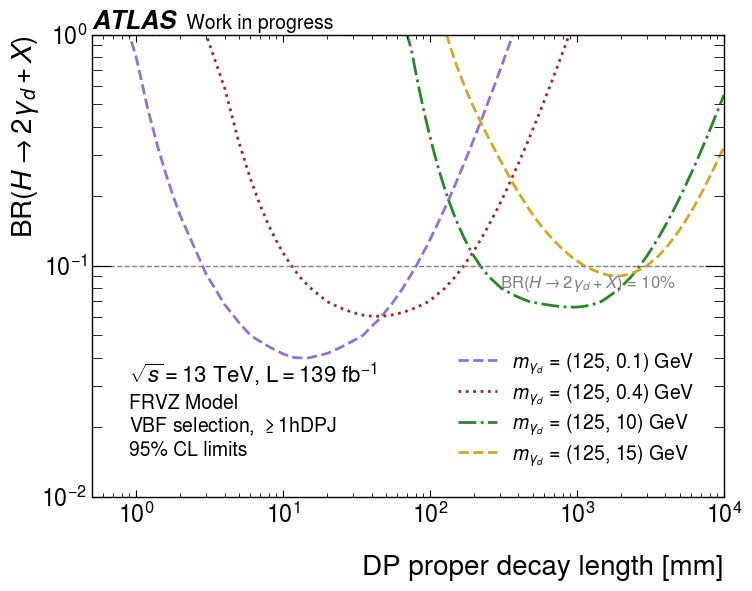

In [8]:
figure, axis = plt.subplots()

plt.plot('ctau', 'exp_lim', data=BR_exp_limits_20p, color='mediumpurple', label='$m_{\\gamma_{d}}$ = (125, 0.1) GeV', linestyle='dashed')
plt.plot('ctau', 'exp_lim', data=BR_exp_limits_20p_500758, color='firebrick', label='$m_{\\gamma_{d}}$ = (125, 0.4) GeV', linestyle='dotted')
plt.plot('ctau', 'exp_lim', data=BR_exp_limits_20p_500761, color='forestgreen', label='$m_{\\gamma_{d}}$ = (125, 10) GeV', linestyle='dashdot')
plt.plot('ctau', 'exp_lim', data=BR_exp_limits_20p_500762, color='goldenrod', label='$m_{\\gamma_{d}}$ = (125, 15) GeV', linestyle='dashed')

plt.plot([1e-1,1e4], [1e-1,1e-1], color='grey', linestyle='--', linewidth=1)
plt.text(3e2, 8e-2, 'BR($H \\rightarrow 2\\gamma_{d} + X$) = 10%', color='grey', fontsize=12)

axis.set_ylabel('BR($H \\rightarrow 2\\gamma_{d} + X$)', labelpad=0)
axis.set_xlabel('DP proper decay length [mm]')
axis.set_xscale('log')
axis.set_yscale('log')
axis.set_ylim(1e-2,1)
axis.set_xlim(0.5,1e4)

plt.text(0.9,3.1e-2,'$\\sqrt{s}=13$ TeV, $\\mathcal{L}=139$ fb$^{-1}$', fontsize=16)
plt.text(0.9,2.4e-2,'FRVZ Model', fontsize=14)
plt.text(0.9,1.9e-2,'VBF selection, $\\geq 1$hDPJ', fontsize=14)
plt.text(0.9,1.5e-2,'95% CL limits', fontsize=14)

hep.atlas.text(' Work in progress', loc=0)
plt.legend(loc=4) #choose legend corner

plt.savefig( cwd + '/plots/BR_exp_vs_ctau_masscompare_20p.png', bbox_inches='tight')

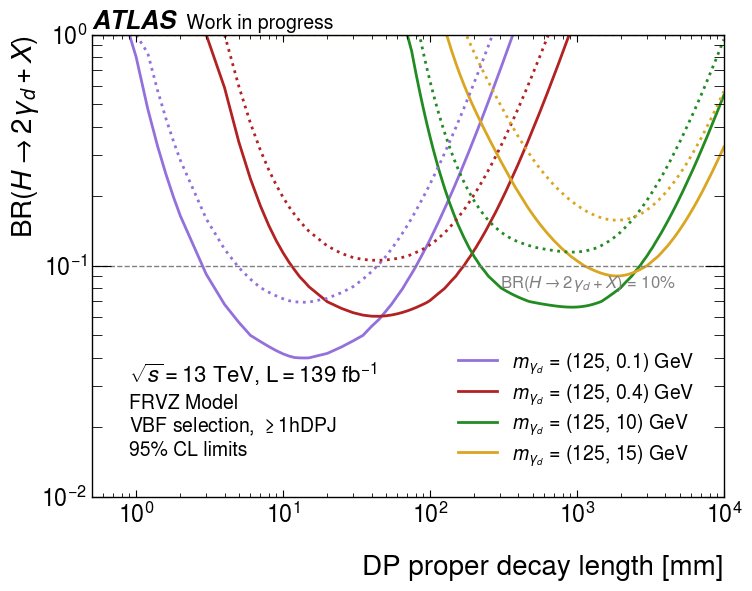

In [9]:
figure, axis = plt.subplots()

plt.plot('ctau', 'exp_lim', data=BR_exp_limits_20p, color='mediumpurple', label='$m_{\\gamma_{d}}$ = (125, 0.1) GeV', linestyle='solid')
plt.plot('ctau', 'exp_lim', data=BR_exp_limits_20p_500758, color='firebrick', label='$m_{\\gamma_{d}}$ = (125, 0.4) GeV', linestyle='solid')
plt.plot('ctau', 'exp_lim', data=BR_exp_limits_20p_500761, color='forestgreen', label='$m_{\\gamma_{d}}$ = (125, 10) GeV', linestyle='solid')
plt.plot('ctau', 'exp_lim', data=BR_exp_limits_20p_500762, color='goldenrod', label='$m_{\\gamma_{d}}$ = (125, 15) GeV', linestyle='solid')

plt.plot('ctau', 'exp_lim', data=dataFiles[0], color='mediumpurple', label='_nolegend_', linestyle='dotted')
plt.plot('ctau', 'exp_lim', data=BR_exp_limits_doublebkg_40p_500758, color='firebrick', label='_nolegend_', linestyle='dotted')
plt.plot('ctau', 'exp_lim', data=BR_exp_limits_doublebkg_40p_500761, color='forestgreen', label='_nolegend_', linestyle='dotted')
plt.plot('ctau', 'exp_lim', data=BR_exp_limits_doublebkg_40p_500762, color='goldenrod', label='_nolegend_', linestyle='dotted')

plt.plot([1e-1,1e4], [1e-1,1e-1], color='grey', linestyle='--', linewidth=1)
plt.text(3e2, 8e-2, 'BR($H \\rightarrow 2\\gamma_{d} + X$) = 10%', color='grey', fontsize=12)

axis.set_ylabel('BR($H \\rightarrow 2\\gamma_{d} + X$)', labelpad=0)
axis.set_xlabel('DP proper decay length [mm]')
axis.set_xscale('log')
axis.set_yscale('log')
axis.set_ylim(1e-2,1)
axis.set_xlim(0.5,1e4)

plt.text(0.9,3.1e-2,'$\\sqrt{s}=13$ TeV, $\\mathcal{L}=139$ fb$^{-1}$', fontsize=16)
plt.text(0.9,2.4e-2,'FRVZ Model', fontsize=14)
plt.text(0.9,1.9e-2,'VBF selection, $\\geq 1$hDPJ', fontsize=14)
plt.text(0.9,1.5e-2,'95% CL limits', fontsize=14)

hep.atlas.text(' Work in progress', loc=0)
plt.legend(loc=4) #choose legend corner

plt.savefig( cwd + '/plots/BR_exp_vs_ctau_masscompare_20p_2bkg40p.png', bbox_inches='tight')

In [11]:
figure, axis = plt.subplots()

plt.plot('ctau', 'exp_lim', data=BR_exp_limits_50p_500757, color='mediumpurple', label='$m_{\\gamma_{d}}$ = (125, 0.1) GeV', linestyle='dashed')
plt.plot('ctau', 'exp_lim', data=BR_exp_limits_50p_500758, color='firebrick', label='$m_{\\gamma_{d}}$ = (125, 0.4) GeV', linestyle='dotted')
plt.plot('ctau', 'exp_lim', data=BR_exp_limits_50p_500761, color='forestgreen', label='$m_{\\gamma_{d}}$ = (125, 10) GeV', linestyle='dashdot')
plt.plot('ctau', 'exp_lim', data=BR_exp_limits_50p_500762, color='goldenrod', label='$m_{\\gamma_{d}}$ = (125, 15) GeV', linestyle='dashed')

plt.plot([1e-1,1e4], [1e-1,1e-1], color='grey', linestyle='--', linewidth=1)
plt.text(3e2, 8e-2, 'BR($H \\rightarrow 2\\gamma_{d} + X$) = 10%', color='grey', fontsize=12)

axis.set_ylabel('BR($H \\rightarrow 2\\gamma_{d} + X$)', labelpad=0)
axis.set_xlabel('DP proper decay length [mm]')
axis.set_xscale('log')
axis.set_yscale('log')
axis.set_ylim(1e-2,1)
axis.set_xlim(0.5,1e4)

plt.text(0.9,3.1e-2,'$\\sqrt{s}=13$ TeV, $\\mathcal{L}=139$ fb$^{-1}$', fontsize=16)
plt.text(0.9,2.4e-2,'FRVZ Model', fontsize=14)
plt.text(0.9,1.9e-2,'VBF caloDPJ SR', fontsize=14)
plt.text(0.9,1.5e-2,'95% CL limits', fontsize=14)

hep.atlas.text(' Internal', loc=0)
plt.legend(loc=4) #choose legend corner

plt.savefig( cwd + '/plots/BR_exp_vs_ctau_masscompare_50p.png', bbox_inches='tight')